# 2020_dl_anomaly_detector

This is an experiment with deep learning for anomaly detection.

In [37]:
import torch
import math
import matplotlib.pyplot as plt

### Data Generators

Regular data (label=0) will be random data with mean=0, std=1. Define functions that can transform random data into irregular data (label=1) with spikes and steps.

In [92]:
def step(data):
    
    print(data.shape)
    
    for i, _ in enumerate(data):
        len_data = len(data[i])-1
        step_point = 126 #int(math.fabs(torch.randn(1)[0])*len_data)
        if step_point > len_data:
            step_point = len_data
        print("Data Index:", i, "   Step Index:", step_point, "   Step Value:", data[i][step_point])
        for j, _ in enumerate(data[i][step_point:]):
            if i == 0:
                print(j)
            data[i][j] = data[i][step_point]*(data[i][j]*10).abs()
    
    return data

def spike(data):
    pass
        

### Define the Data with Labels

In [95]:
train_data = torch.randn(128, 256)
valid_data = torch.randn(32, 256)
test_data = (torch.randn(32, 256))

train_labels = torch.zeros([4, 32], dtype=torch.long)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

### Visualize the Data

torch.Size([32, 256])


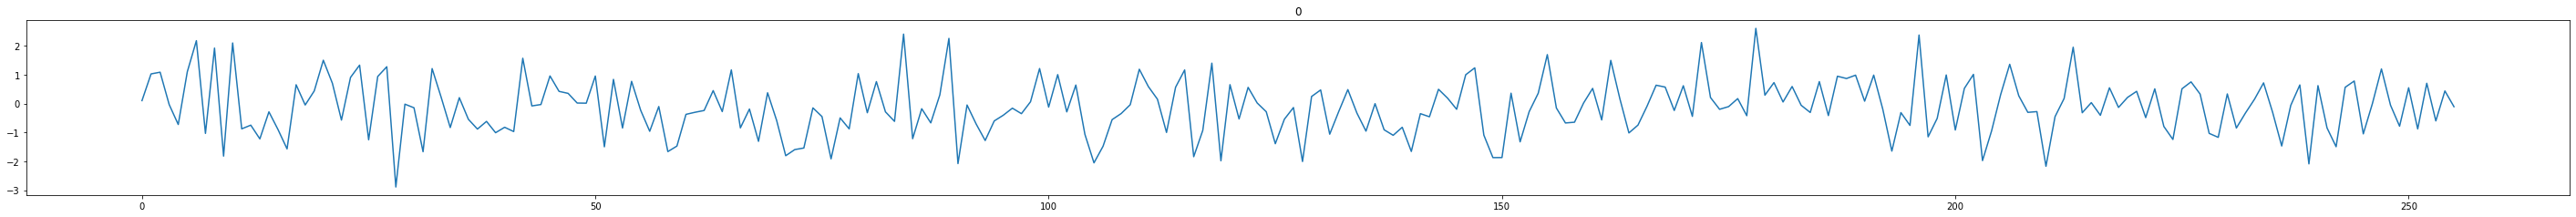

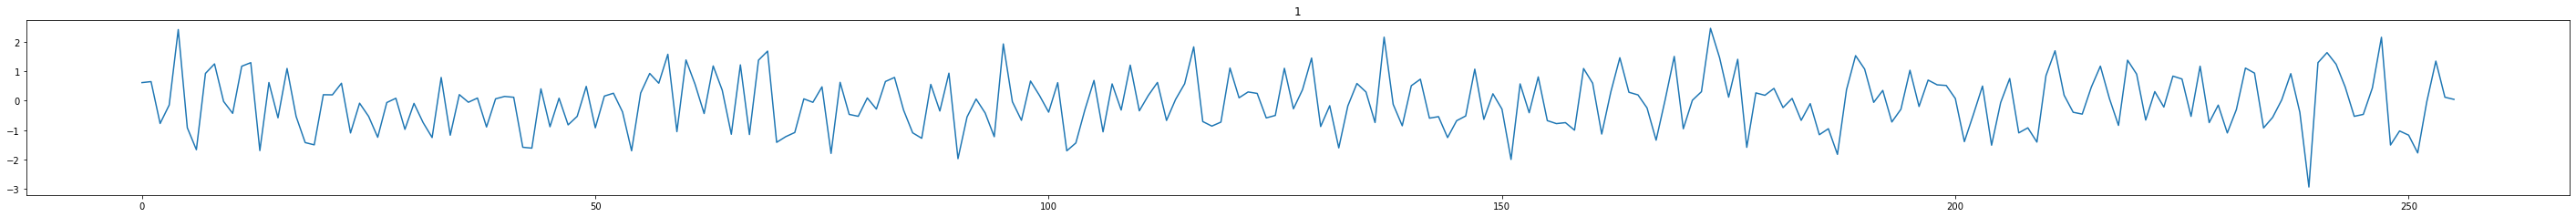

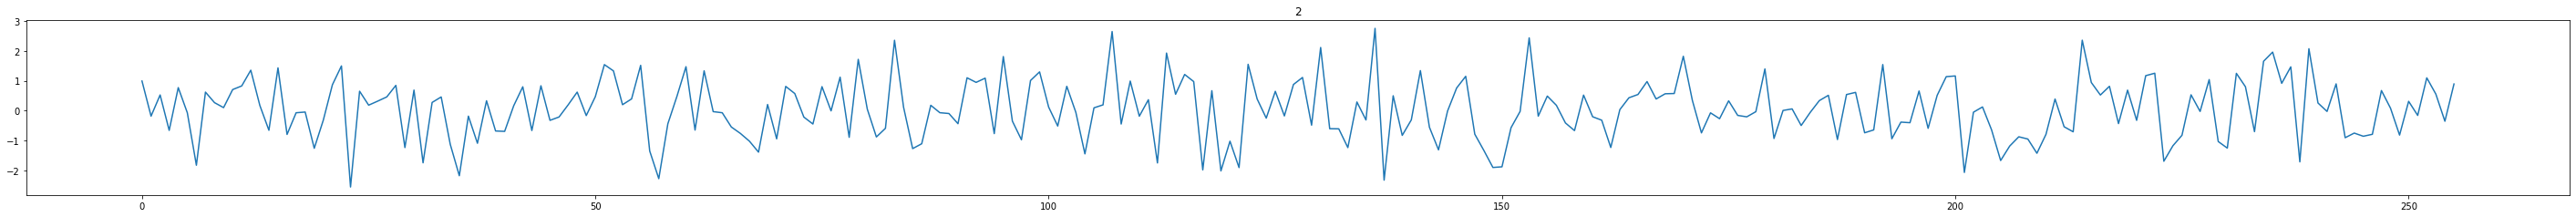

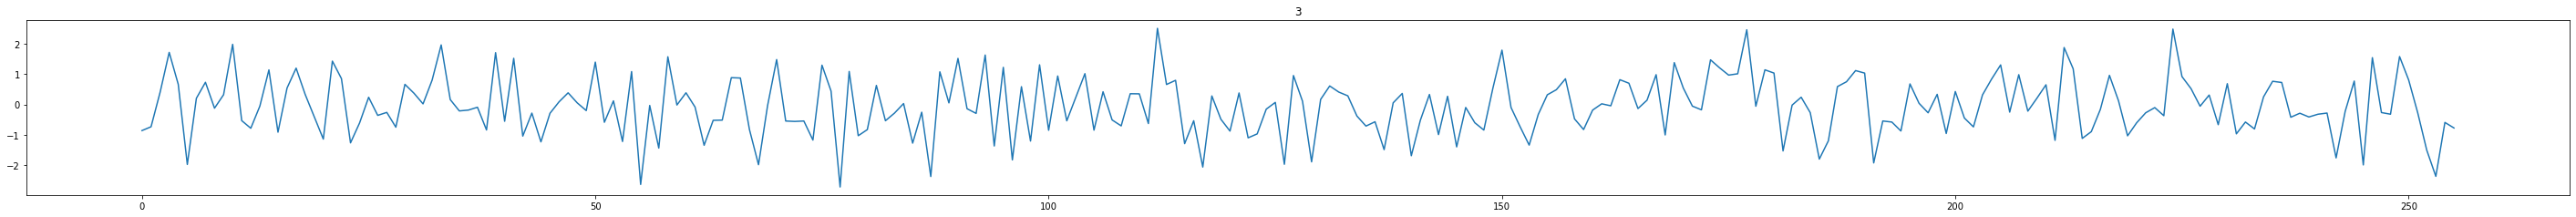

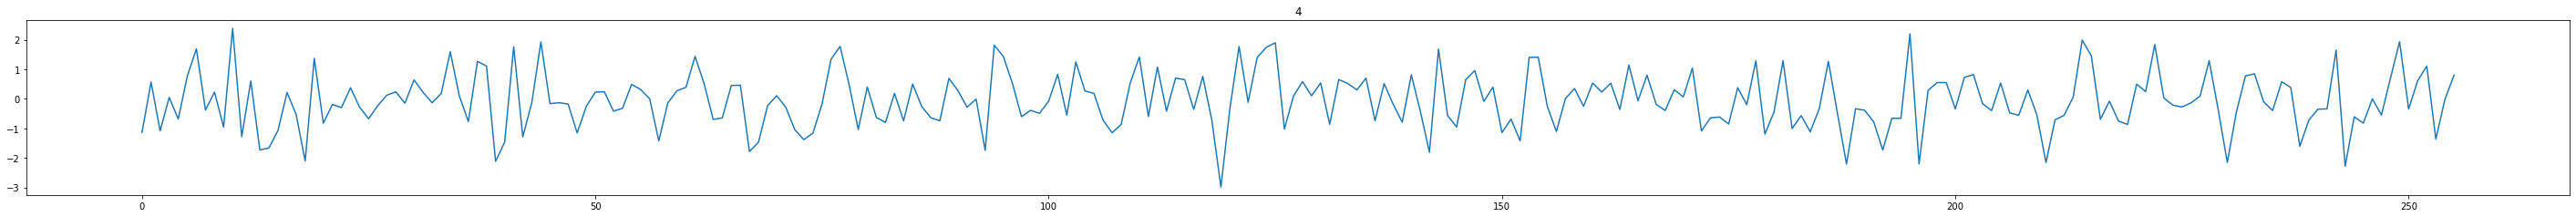

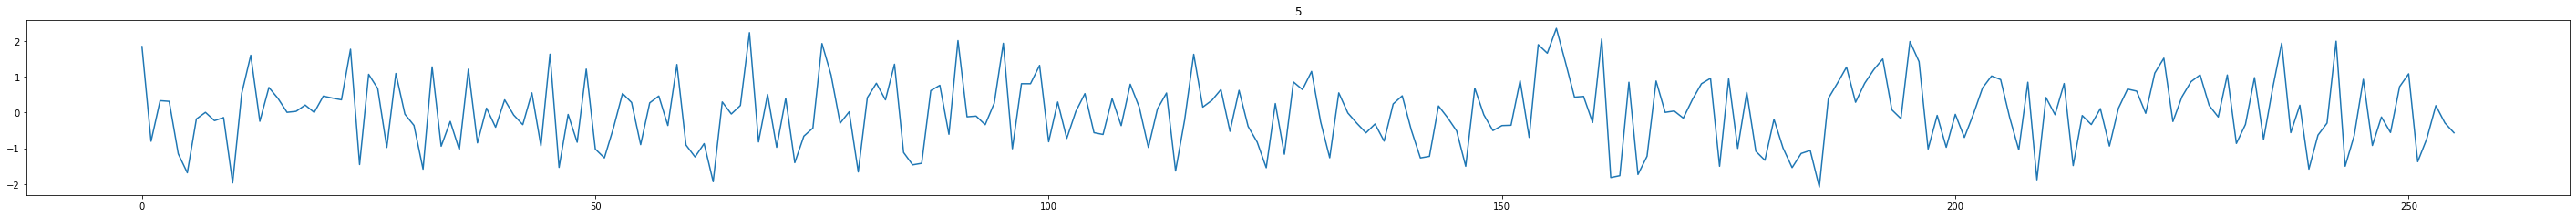

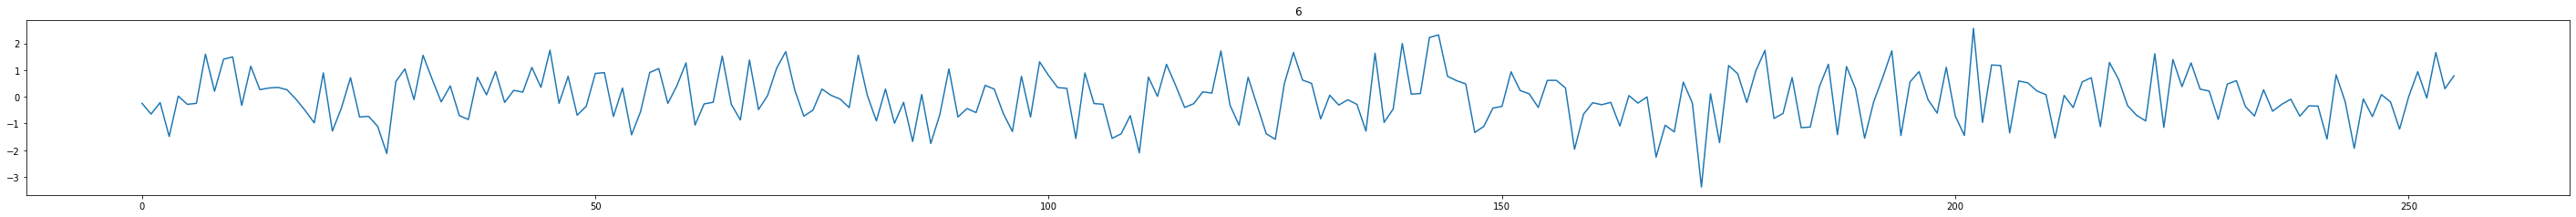

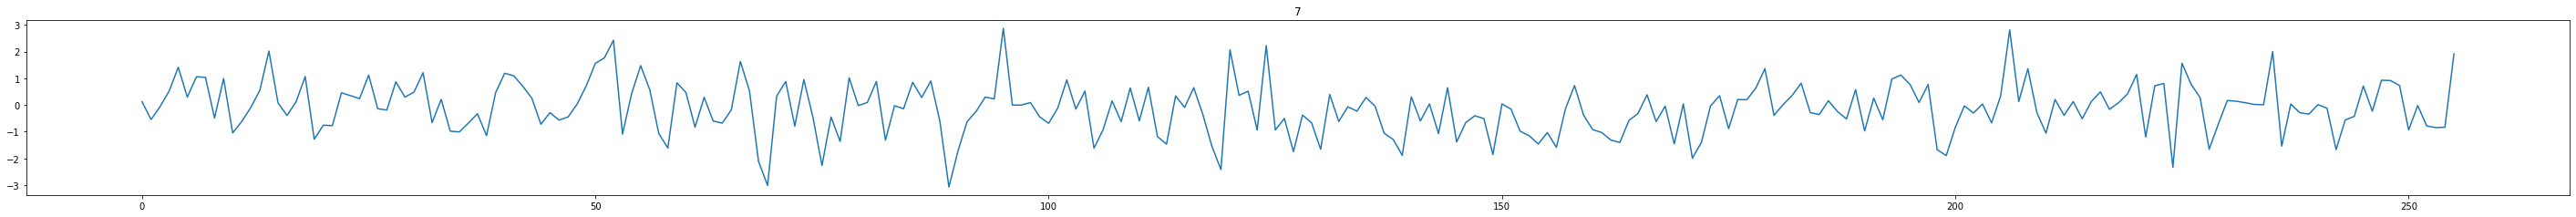

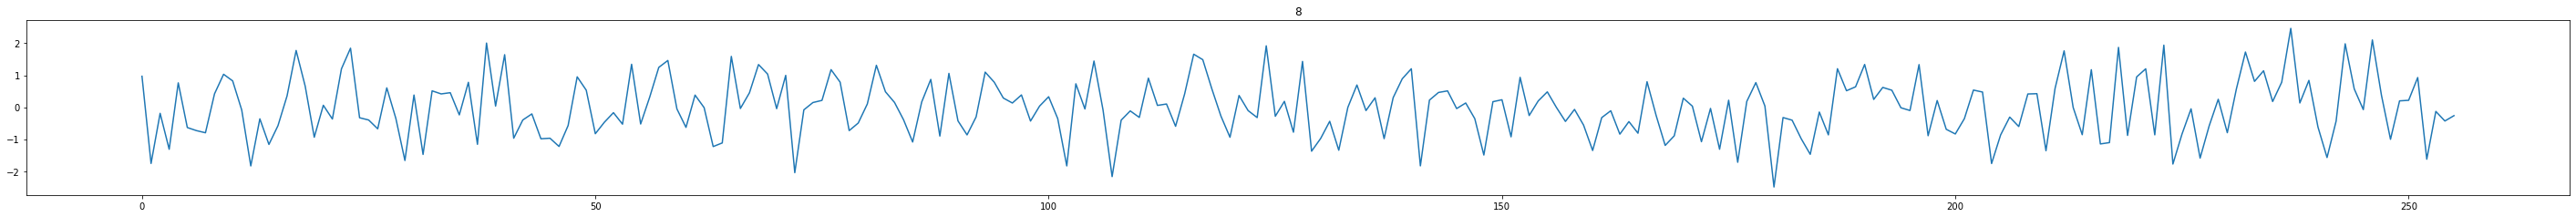

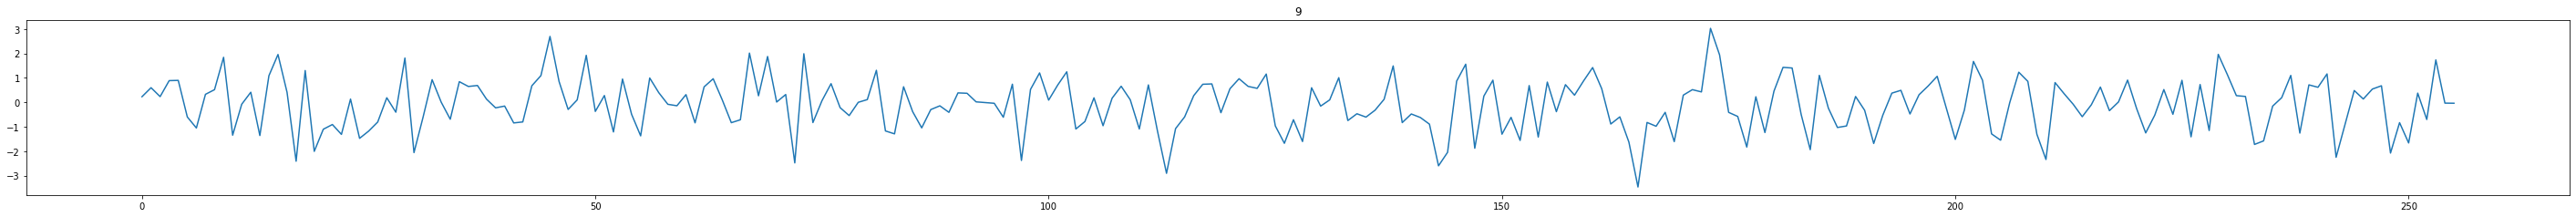

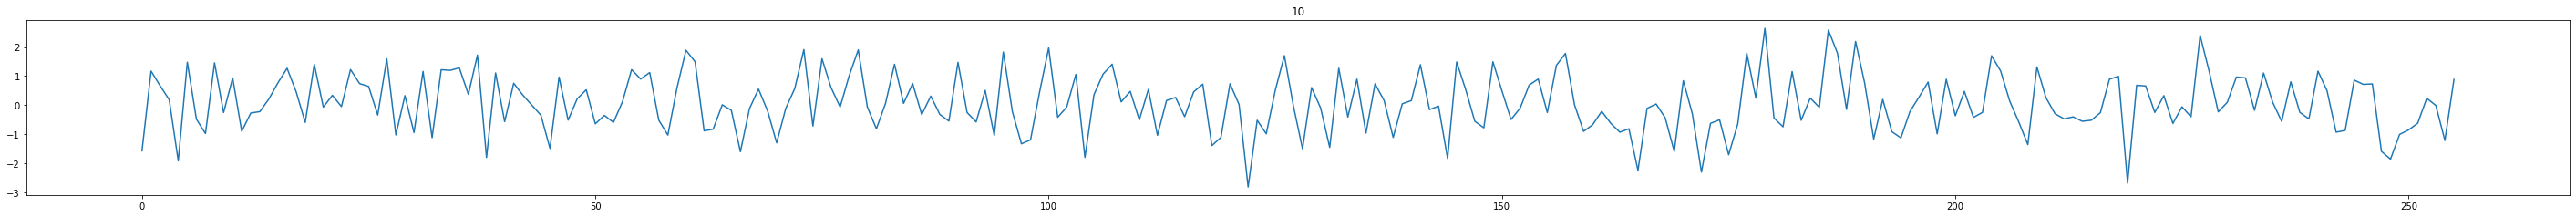

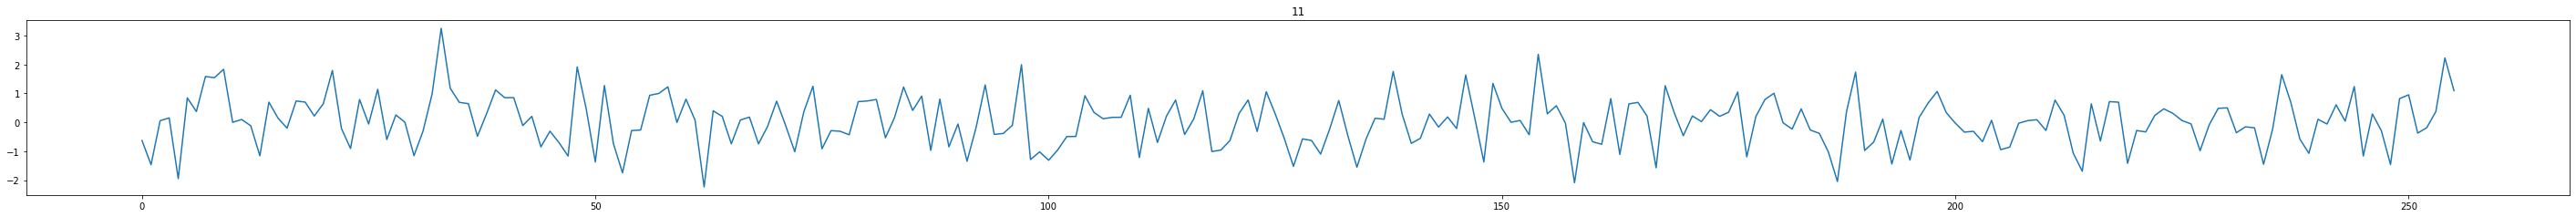

In [96]:
dataiter = iter(test_loader)
data = dataiter.next()
print(data.shape)

for i, dset in enumerate(data[:12]):
    plt.figure(figsize=(50, 50))
    plt.subplot(12, 1, i+1)
    plt.plot(dset)
    plt.title(i)

### Define the Model

In [47]:
from torch import nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        
        return F.softmax(self.fc2(x), dim=1)
    
model = Model()
model

Model(
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [48]:
error_funct = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

### Train the Model

In [49]:
epochs = 30

for e in range(epochs):
    
    label_iter = iter(train_labels)
    
    train_loss = 0
    train_losses = []
    
    for data in train_loader:
        probs = model(data)
        
        optimizer.zero_grad()
        
        labels = next(label_iter)
        
        #print(data.shape, labels.shape, train_labels.shape, len(train_labels))
        
        loss = error_funct(probs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
    train_loss = train_loss/len(train_loader.sampler)
    train_losses.append(train_loss)
    
    print("Epoch:", e+1, "\tTraining loss:", train_loss) #, "\tValidation loss:", valid_loss)
        
        
    #for valid_data in valid_loader

Epoch: 1 	Training loss: -0.4495577961206436
Epoch: 2 	Training loss: -0.4565207287669182
Epoch: 3 	Training loss: -0.46351412683725357
Epoch: 4 	Training loss: -0.4705336168408394
Epoch: 5 	Training loss: -0.4775726944208145
Epoch: 6 	Training loss: -0.4846278354525566
Epoch: 7 	Training loss: -0.491693452000618
Epoch: 8 	Training loss: -0.4987645596265793
Epoch: 9 	Training loss: -0.5058354288339615
Epoch: 10 	Training loss: -0.5129006505012512
Epoch: 11 	Training loss: -0.5199531614780426
Epoch: 12 	Training loss: -0.5269887149333954
Epoch: 13 	Training loss: -0.5340026319026947
Epoch: 14 	Training loss: -0.5409897118806839
Epoch: 15 	Training loss: -0.547945037484169
Epoch: 16 	Training loss: -0.5548629909753799
Epoch: 17 	Training loss: -0.5617390722036362
Epoch: 18 	Training loss: -0.5685688257217407
Epoch: 19 	Training loss: -0.5753477662801743
Epoch: 20 	Training loss: -0.582070991396904
Epoch: 21 	Training loss: -0.5887342989444733
Epoch: 22 	Training loss: -0.5953344106674194